1. Importación de librerías y configuración

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Configuración de visualización
plt.style.use('default')
sns.set_theme()
plt.rcParams['figure.figsize'] = (12, 8)

2. Carga de datos

In [9]:
# Carga de datos
df = pd.read_csv('../data/dataset_correlacion_satisfaccion.csv')
df.head()

,id_estudiante,fecha_consulta,derivado,tipo_consulta,urgencia,tiempo_consulta,tiempo_espera,id_asesor,calidad_del_servicio,consulta_resuelta,puntaje_esfuerzo_cliente,indice_promotor_neto,satisfaccion_estudiante
0,E00001,2023-03-01,True,Queja,Baja,802,642,A248,2,True,5,77,3
1,E00002,2023-05-08,False,Consulta de matrícula,Baja,1514,474,A052,1,True,2,78,3
2,E00003,2023-06-03,True,Consulta de matrícula,Media,1285,691,A295,1,True,3,53,3
3,E00004,2024-09-14,True,Solicitud de documentos,Media,1525,1316,A201,2,True,4,40,3
4,E00005,2023-03-26,True,Queja,Media,1324,166,A150,3,True,2,70,3


3. Cálculo de correlaciones de Pearson con la variable objetivo

In [10]:
# Selección de variables numéricas
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Cálculo de correlaciones con la variable objetivo
correlations = df[numeric_columns].corr()['satisfaccion_estudiante'].sort_values(ascending=False)
correlations = correlations.drop('satisfaccion_estudiante')
correlations

indice_promotor_neto        0.867316
calidad_del_servicio        0.400539
tiempo_espera              -0.395494
tiempo_consulta            -0.557159
puntaje_esfuerzo_cliente   -0.695856
Name: satisfaccion_estudiante, dtype: float64

4. Visualización de correlaciones (gráfico de barras)

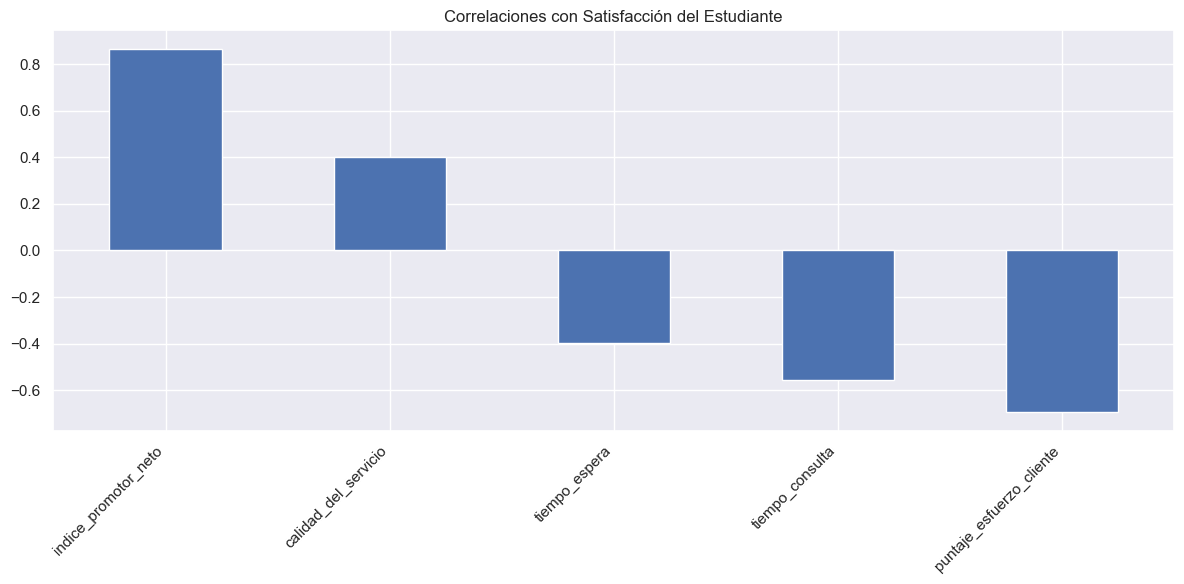

In [11]:
plt.figure(figsize=(12, 6))
correlations.plot(kind='bar')
plt.title('Correlaciones con Satisfacción del Estudiante')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

5. Matriz de correlaciones (heatmap)

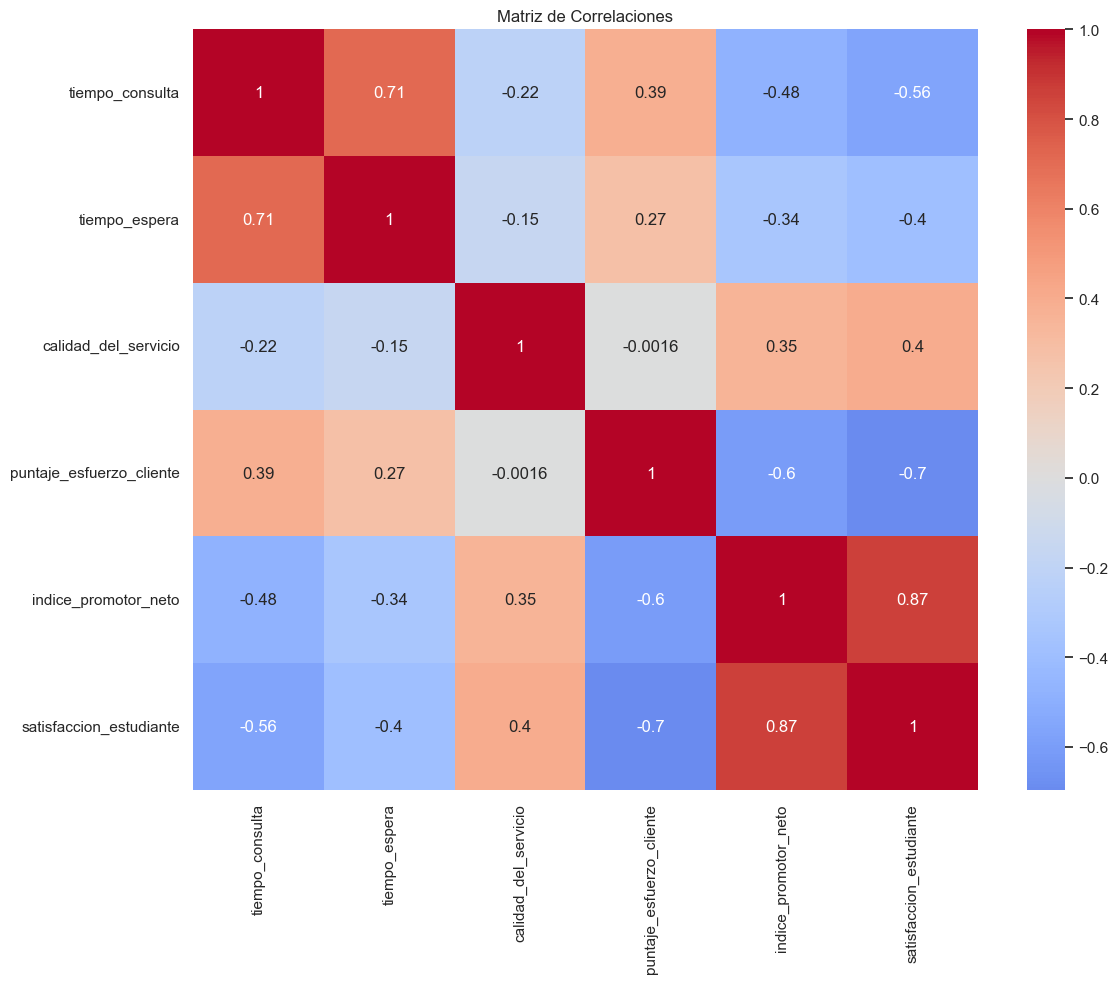

In [12]:
plt.figure(figsize=(12, 10))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlaciones')
plt.tight_layout()
plt.show()

6. Hipótesis y significancia estadística

In [13]:
n = len(df)
for var, corr in correlations.items():
    p_value = stats.pearsonr(df[var], df['satisfaccion_estudiante'])[1]
    significance = 'significativa' if p_value < 0.05 else 'no significativa'
    direction = 'positiva' if corr > 0 else 'negativa'
    print(f'Variable: {var}')
    print(f'Correlación: {corr:.3f} ({direction})')
    print(f'Significancia: {significance} (p-value: {p_value:.4f})')
    print(f'Hipótesis: Existe una correlación {direction} {significance} entre {var} y la satisfacción del estudiante.')
    print('-' * 80)

Variable: indice_promotor_neto
Correlación: 0.867 (positiva)
Significancia: significativa (p-value: 0.0000)
Hipótesis: Existe una correlación positiva significativa entre indice_promotor_neto y la satisfacción del estudiante.
--------------------------------------------------------------------------------
Variable: calidad_del_servicio
Correlación: 0.401 (positiva)
Significancia: significativa (p-value: 0.0000)
Hipótesis: Existe una correlación positiva significativa entre calidad_del_servicio y la satisfacción del estudiante.
--------------------------------------------------------------------------------
Variable: tiempo_espera
Correlación: -0.395 (negativa)
Significancia: significativa (p-value: 0.0000)
Hipótesis: Existe una correlación negativa significativa entre tiempo_espera y la satisfacción del estudiante.
--------------------------------------------------------------------------------
Variable: tiempo_consulta
Correlación: -0.557 (negativa)
Significancia: significativa (p-val

7. Visualización de relaciones bivariadas (scatterplots)


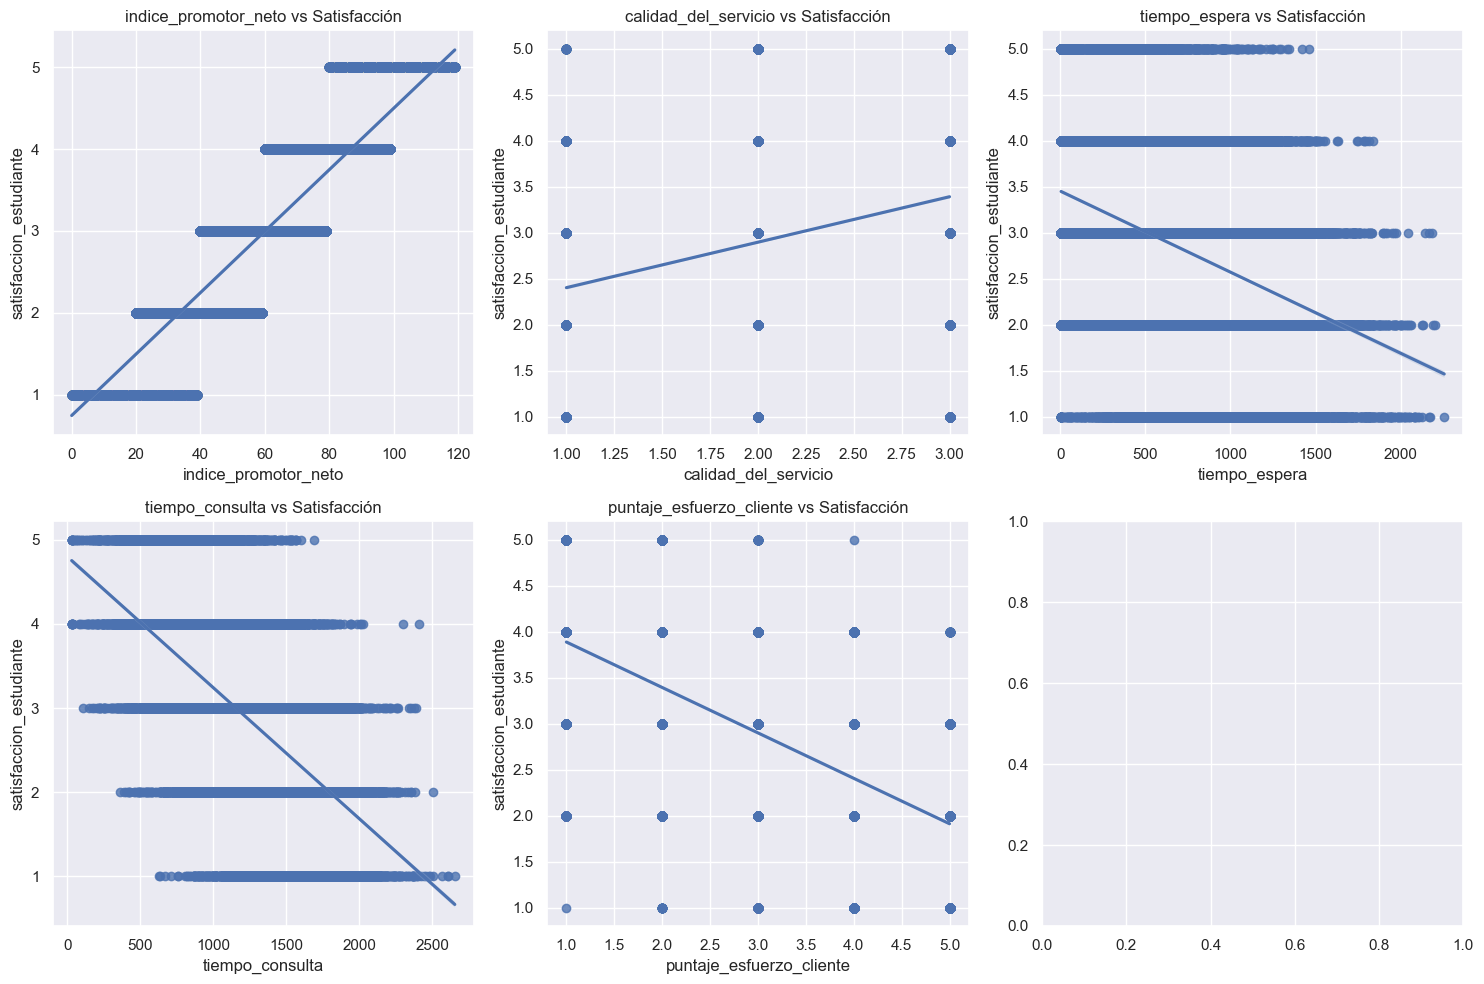

In [14]:
top_correlations = correlations.head(5).index
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, var in enumerate(top_correlations):
    sns.regplot(data=df, x=var, y='satisfaccion_estudiante', ax=axes[idx])
    axes[idx].set_title(f'{var} vs Satisfacción')

plt.tight_layout()
plt.show()

8. Conclusiones (Markdown) ## Conclusiones

- Las correlaciones y su significancia se muestran arriba.
- Considera las variables con correlaciones más altas y significativas para modelos predictivos.
- Si ninguna variable es significativa, puede ser necesario explorar variables categóricas, crear nuevas variables o revisar la calidad de los datos.